# payam_saemi
### Adaline implementation

#### Importing libs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# generating data
#### The first category: 
contains 100 data, whose x variable has a mean of 0 and a standard deviation of 0.1, and its y variable as well.
It has a mean of 0 and a standard deviation of 0.4. 

#### The second category:
contains 100 data, whose x variable has a mean of 1 and a standard deviation of 0.2, and its y variable as well.
It has a mean of 1 and a standard deviation of 0.2.

In [2]:
xdata_mean_A , xdata_sigma_A , n = 0 , 0.1 , 100
ydata_mean_A , ydata_sigma_A = 0 , 0.4
xdata_mean_B , xdata_sigma_B = 1 , 0.2
ydata_mean_B , ydata_sigma_B = 1 , 0.2

# class A :
Xdata_A = np.random.normal(xdata_mean_A , xdata_sigma_A , n)
Ydata_A = np.random.normal(ydata_mean_A , xdata_sigma_A , n)
# Class B :
Xdata_B = np.random.normal(xdata_mean_B , xdata_sigma_B , n)
Ydata_B = np.random.normal(ydata_mean_B , ydata_sigma_B , n)


## Concating
concating data to generate final data_set

In [3]:
## ClassA_matrix
Xdata_A_matrix = np.matrix([Xdata_A])
Ydata_A_matrix = np.matrix([Ydata_A])
ClassA_matrix = np.concatenate((Xdata_A_matrix, Ydata_A_matrix), axis=0)
LabelA = -np.ones(n)
LabelA = np.matrix([LabelA])
ClassA_matrix = np.concatenate((ClassA_matrix, LabelA), axis=0)
ClassA_matrix = ClassA_matrix.transpose()


## ClassB_matrix
Xdata_B_matrix = np.matrix([Xdata_B])
Ydata_B_matrix = np.matrix([Ydata_B])
ClassB_matrix = np.concatenate((Xdata_B_matrix, Ydata_B_matrix), axis=0)
LabelB = np.ones(n)
LabelB = np.matrix([LabelB])
ClassB_matrix = np.concatenate((ClassB_matrix, LabelB), axis=0)
ClassB_matrix = ClassB_matrix.transpose()


final_data = np.concatenate((ClassA_matrix , ClassB_matrix) , axis=0)
np.random.shuffle(final_data)


X = final_data[:,:2]
target = final_data[:,2]

### Display categories of data

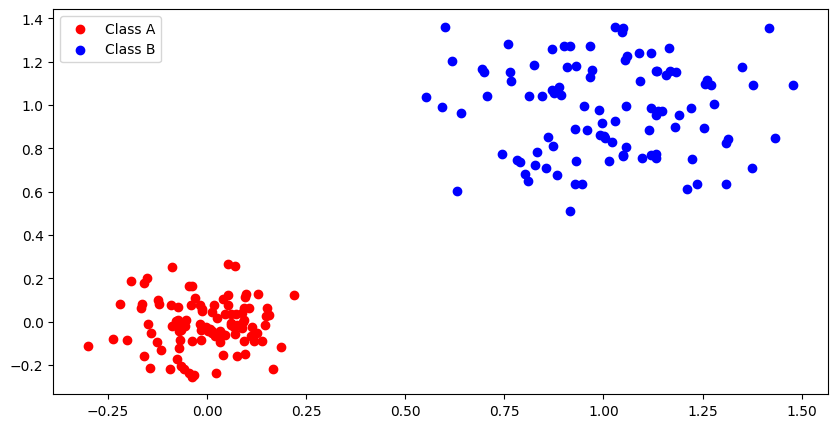

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(Xdata_A , Ydata_A , color="red")
plt.scatter(Xdata_B , Ydata_B , color="blue")
plt.legend(['Class A' , "Class B"] , loc='upper left')

### Adaline implementation

In [5]:
class Adaline:
  def __init__(self , learning_rate  , n_iter ):
   self.learning_rate = learning_rate
   self.n_iter = n_iter
    
  def predict(self , X ):
   self.net = np.dot(X , self.weights) + self.bias
   return np.where( self.net >= 0 , 1 , -1)
    
  def net_(self , X):
    self.net = np.dot(X , self.weights) + self.bias
  
  def updating_bias(self , target):
    self.bias += self.learning_rate*(target - self.net) 
    
  def updating_weights(self , target , X  ):
    for cul in range (X.shape[1]):   
      self.weights[cul] += self.learning_rate*(target - self.net)*X[0 , cul ]
      
  def fit(self , X , target):
    self.net = 0
    self.weights = np.random.randn(X.shape[1])
    self.bias = 0
    self.mse_list = []
    
    for pair in range (self.n_iter):
      self.error = []
      for row in range (X.shape[0]):
        self.net_(X[row])
        self.error.append(0.5*(target[row] - self.net)**2)
        self.updating_weights(target[row] , X[row])
        self.updating_bias(target[row])
      self.mse_list.append(sum(self.error) / len(self.error))
    return self

## Modelling Adaline

In [6]:
model = Adaline(0.08 , 10)
model.fit(X , target )

C:\Users\saeme\AppData\Local\Temp\ipykernel_16516\2794349195.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.weights[cul] += self.learning_rate*(target - self.net)*X[0 , cul ]


## Visualize

In [7]:
def plot_decision_regions1(X, y, classifier, resolution=0.02):

   markers = ['s', 'x', 'o', '^', 'v']
   colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
   cmap = ListedColormap(colors[:len(np.unique(y))]) # type: ignore

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker= markers[idx], label=cl)

<class 'numpy.ndarray'>


C:\Users\saeme\AppData\Local\Temp\ipykernel_16516\3777193590.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


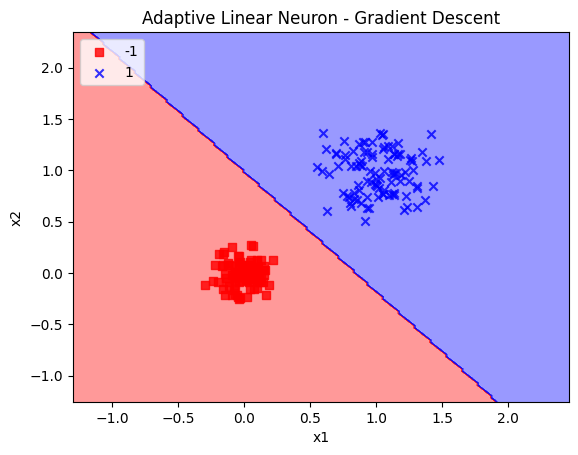

<class 'list'>


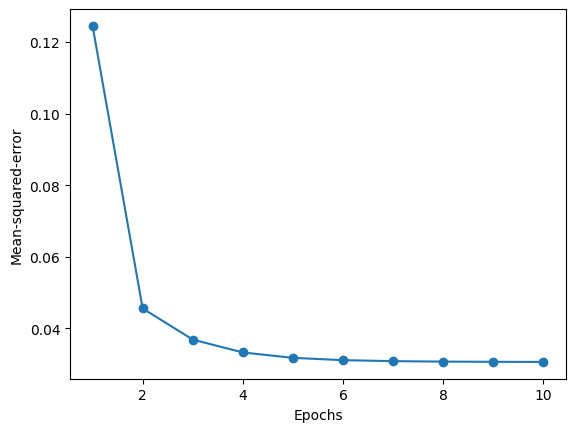

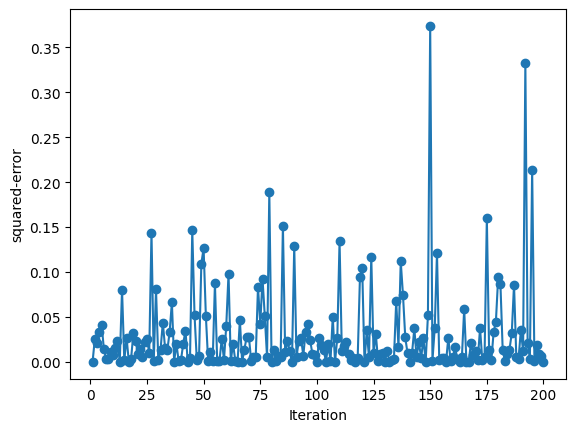

In [9]:
X = final_data[:, :2]
X = np.squeeze(np.asarray(X))

print(type(X))
#print(target)
target = np.int_(target)
target = target.reshape(-1)
target = np.squeeze(np.asarray(target))
#print(target)
#print(X)
plot_decision_regions1( X,target, model,0.02)

plt.title('Adaptive Linear Neuron - Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()
print(type(model.mse_list))
model.mse_list = np.squeeze(np.asarray(model.mse_list))
plt.plot(range(1, len(model.mse_list) + 1), model.mse_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean-squared-error')
plt.show()
model.error = np.squeeze(np.asarray(model.error))
plt.plot(range(1, len(model.error) + 1), model.error, marker='o')
plt.xlabel('Iteration')
plt.ylabel('squared-error')
plt.show()